<a href="https://colab.research.google.com/github/yadavrishi34/Machine_Learning_Repository/blob/master/Project_17_Predict_The_Flight_Ticket_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict The Flight Ticket Price 

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

# Table of Contents

 Problem Definition
    
   *  Project Overview
   *  Problem Statement


 Dataset Analysis
 
  * Importing Python libraries
  
  * Importing the data
  
  * Data Description and Exploratory Visualisations
  
  * Overview
  
  * Missing Value
  
  * Statistics Value
  
  * Numerical features overview
  
  * Feature distribution by target attribute
  
  * Target Variable: Attrition
  
  * Correlation
  
  * EDA   
  
 Data Scalling & Split into train & test

   * LabelEncoding
   
   * Splitting data into training and testing sets


Building Machine Learning Models
 
   * Baseline Algorithms
  
    
   * Ridge Regressor 
            Root mean squared error
            Mean absolute 
            R-squared

        
   * Lasso Regressor 
            Root mean squared error
            Mean absolute 
            R-squared
   
   * KNN Regressor 
            Root mean squared error
            Mean absolute 
            R-squared
        
   * DecisionTreeRegressor 
            Root mean squared error
            Mean absolute 
            R-squared
   
   * Random Forest Regressor 
            Root mean squared error
            Mean absolute 
            R-squared

  * XGBoost Regressor 
            Root mean squared error
            Mean absolute 
            R-squared
   
   
conclusion Remarks
 
    DecisionTreeRegressor accuracy is high as compare to other alogrithm so we can final model with DecisionTreeRegressor

In [1]:
# image classification as per assignment 1 try on downloaded image from web scraping
#get acess from google drive data into google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_excel (r'/content/flight.xlsx',sep=',',na_values=".")

In [4]:
# first ten row

df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,NewDelhi,BLR→DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Noinfo,3897
1,AirIndia,1/05/2019,Kolkata,Banglore,CCU→IXR→BBI→BLR,05:50,13:15,7h 25m,2 stops,Noinfo,7662
2,JetAirways,9/06/2019,Delhi,Cochin,DEL→LKO→BOM→COK,09:25,04:25 10 Jun,19h,2 stops,Noinfo,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU→NAG→BLR,18:05,23:30,5h 25m,1 stop,Noinfo,6218
4,IndiGo,01/03/2019,Banglore,NewDelhi,BLR→NAG→DEL,16:50,21:35,4h 45m,1 stop,Noinfo,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU→BLR,09:00,11:25,2h 25m,non-stop,Noinfo,3873
6,JetAirways,12/03/2019,Banglore,NewDelhi,BLR→BOM→DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flightmealnotincluded,11087
7,JetAirways,01/03/2019,Banglore,NewDelhi,BLR→BOM→DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Noinfo,22270
8,JetAirways,12/03/2019,Banglore,NewDelhi,BLR→BOM→DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flightmealnotincluded,11087
9,Multiplecarriers,27/05/2019,Delhi,Cochin,DEL→BOM→COK,11:25,19:15,7h 50m,1 stop,Noinfo,8625


In [5]:
df.shape

(10683, 11)

In [6]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# check data shape after drop na file
df.shape

(10682, 11)

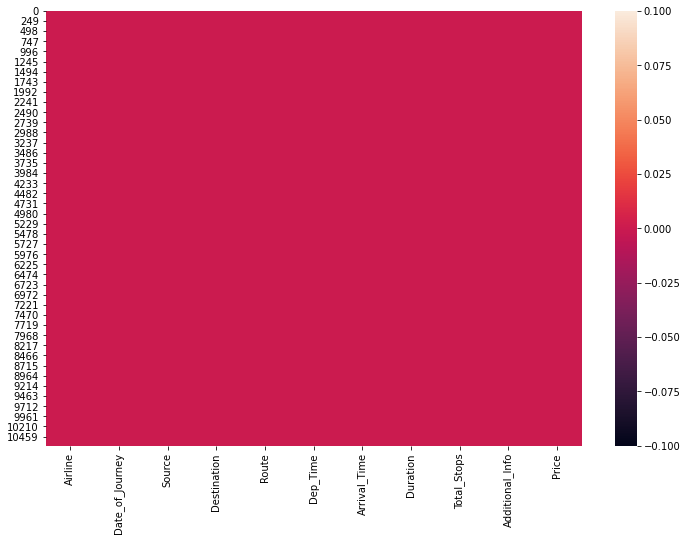

In [11]:
fig=plt.subplots(figsize=(12,8))

sns.heatmap(df.isnull())

In [12]:
# Checking if there are any Duplicate values
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,JetAirways,1/06/2019,Delhi,Cochin,DEL→NAG→BOM→COK,14:35,04:25 02 Jun,13h 50m,2 stops,Noinfo,13376
1061,AirIndia,21/05/2019,Delhi,Cochin,DEL→GOI→BOM→COK,22:00,19:15 22 May,21h 15m,2 stops,Noinfo,10231
1348,AirIndia,18/05/2019,Delhi,Cochin,DEL→HYD→BOM→COK,17:15,19:15 19 May,26h,2 stops,Noinfo,12392
1418,JetAirways,6/06/2019,Delhi,Cochin,DEL→JAI→BOM→COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flightmealnotincluded,10368
1674,IndiGo,24/03/2019,Banglore,NewDelhi,BLR→DEL,18:25,21:20,2h 55m,non-stop,Noinfo,7303
...,...,...,...,...,...,...,...,...,...,...,...
10112,JetAirways,18/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 19 May,22h 55m,2 stops,Noinfo,15129
10193,JetAirways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,Noinfo,13376
10406,AirIndia,6/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 07 Mar,26h 35m,2 stops,Noinfo,12646
10594,JetAirways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,Noinfo,12819


In [13]:

#Lets chcek the value counts
for col in df.columns:
    if df[col].dtype=="object":
        print('-'*100)
        print(df[col].value_counts())
       
        print()
#We see no customer is repeated so each customer is only availabe once in the dataset
#All instances are for one country US so we can drop this column as it is constant having no variance
#We can drop one of the column from "State Code" and "State" as both show same info
#Also we observe all the claims info are for single year

----------------------------------------------------------------------------------------------------
JetAirways                        3849
IndiGo                            2053
AirIndia                          1751
Multiplecarriers                  1196
SpiceJet                           818
Vistara                            479
AirAsia                            319
GoAir                              194
MultiplecarriersPremiumeconomy      13
JetAirwaysBusiness                   6
VistaraPremiumeconomy                3
Trujet                               1
Name: Airline, dtype: int64

----------------------------------------------------------------------------------------------------
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019   

In [14]:
# Drop duplicates value
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df["Additional_Info"].value_counts()

Noinfo                       8227
In-flightmealnotincluded     1949
Nocheck-inbaggageincluded     318
1Longlayover                   19
Changeairports                  7
Businessclass                   4
NoInfo                          3
Red-eyeflight                   1
2Longlayover                    1
1Shortlayover                   1
Name: Additional_Info, dtype: int64

Convert No Info into No info because both are same

In [16]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [17]:
df["Additional_Info"].value_counts()

Noinfo                       8227
In-flightmealnotincluded     1949
Nocheck-inbaggageincluded     318
1Longlayover                   19
Changeairports                  7
Businessclass                   4
NoInfo                          3
Red-eyeflight                   1
2Longlayover                    1
1Shortlayover                   1
Name: Additional_Info, dtype: int64

# Feature Engineering

In [18]:
# Feature Engineering ( Dividing data into features and labels)

df.Duration.head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

Duration is in xh ym formate, some don't have information of mintues. we will separte duration into hour in mintue in the following section.

In [19]:
d = list(df.Duration)
duration_hour = []
duration_min = []

for time in d:
    if len(time.split()) == 2: #cell with both hour and mintues data
        hour = time.split()[0].rsplit('h')[0]
        mintues = time.split()[1].rsplit('m')[0]
        duration_hour.append(hour)
        duration_min.append(mintues)
    else: 
        #data with only hour or mintue information.
        if 'h' in time.split()[0]:
            hour =  time.split()[0].rsplit('h')[0]
            duration_hour.append(int(hour))
            duration_min.append(0) 
            # 0 mintues in there are no mintues data
        elif 'm'in time.split()[0]:
            mintues =  time.split()[0].rsplit('m')[0]
            duration_hour.append(0)
            duration_min.append(int(mintues))

In [20]:
#Check whether the length of the two lists we just created is same with the data set.
len(duration_hour) == len(duration_min ) == len(df)

True

In [21]:
df['duration_hour'] = pd.DataFrame(duration_hour).astype('int32')
df['duration_min'] = pd.DataFrame(duration_min).astype('int32')
df.drop(['Duration'],axis = 1, inplace = True)

In [22]:
df.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Total_Stops        False
Additional_Info    False
Price              False
duration_hour       True
duration_min        True
dtype: bool

In [23]:
# drop missing value
df.dropna(inplace=True)

In [24]:
df.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Total_Stops        False
Additional_Info    False
Price              False
duration_hour      False
duration_min       False
dtype: bool

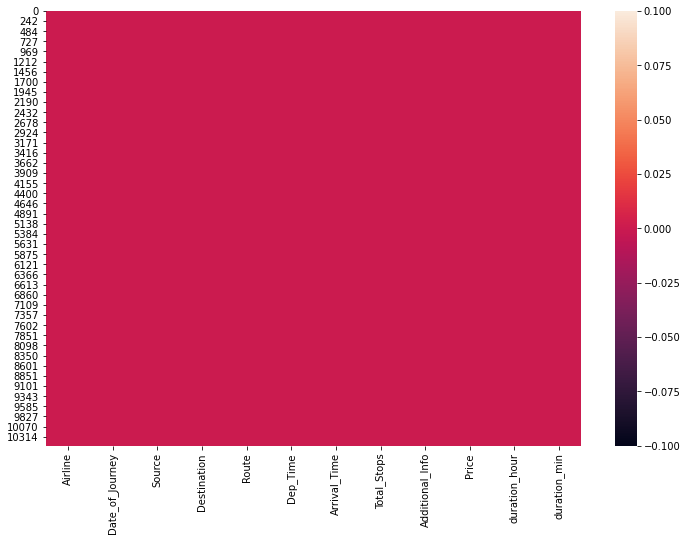

In [25]:
fig=plt.subplots(figsize=(12,8))

sns.heatmap(df.isnull())

No missing value in features columns (price is target, the missing values come from test set).

Separate the data set back into orginial form.

In [26]:
# drop date of journey & split into day of journey & month
df['Day_of_Journey'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df['Month_of_Journey'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month
df.drop(['Date_of_Journey'],axis =1, inplace=True)

In [27]:
# drop dep time & split into dep hour and minute
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis =1, inplace=True)

In [28]:
# drop arrival time & split into arrival hour and minute
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,duration_hour,duration_min,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,NewDelhi,BLR→DEL,non-stop,Noinfo,3897,2.0,50.0,24,3,22,20,1,10
1,AirIndia,Kolkata,Banglore,CCU→IXR→BBI→BLR,2 stops,Noinfo,7662,7.0,25.0,1,5,5,50,13,15
2,JetAirways,Delhi,Cochin,DEL→LKO→BOM→COK,2 stops,Noinfo,13882,19.0,0.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU→NAG→BLR,1 stop,Noinfo,6218,5.0,25.0,12,5,18,5,23,30
4,IndiGo,Banglore,NewDelhi,BLR→NAG→DEL,1 stop,Noinfo,13302,4.0,45.0,1,3,16,50,21,35


In [30]:
df['Airline'].value_counts()

JetAirways                        3687
IndiGo                            2023
AirIndia                          1682
Multiplecarriers                  1179
SpiceJet                           806
Vistara                            470
AirAsia                            316
GoAir                              193
MultiplecarriersPremiumeconomy      13
JetAirwaysBusiness                   6
VistaraPremiumeconomy                3
Trujet                               1
Name: Airline, dtype: int64

# statistical data interface

In [31]:
#Lets check the corrrelation matrix
df.corr()

,Price,duration_hour,duration_min,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Price,1.000000,0.022782,-0.011241,-0.156165,-0.111089,0.006123,-0.024765,0.027411,-0.085096
duration_hour,0.022782,1.000000,-0.132665,-0.009134,-0.001774,0.006541,0.025308,-0.004909,-0.003123
duration_min,-0.011241,-0.132665,1.000000,0.005305,-0.016248,-0.014363,0.009194,-0.005795,0.015231
Day_of_Journey,-0.156165,-0.009134,0.005305,1.000000,-0.037733,-0.002610,-0.006674,-0.000510,-0.016810
Month_of_Journey,-0.111089,-0.001774,-0.016248,-0.037733,1.000000,0.041670,-0.063046,-0.000832,-0.099224
Dep_hour,0.006123,0.006541,-0.014363,-0.002610,0.041670,1.000000,-0.016683,-0.004558,0.072363
Dep_min,-0.024765,0.025308,0.009194,-0.006674,-0.063046,-0.016683,1.000000,0.045271,-0.018517
Arrival_hour,0.027411,-0.004909,-0.005795,-0.000510,-0.000832,-0.004558,0.045271,1.000000,-0.151604
Arrival_min,-0.085096,-0.003123,0.015231,-0.016810,-0.099224,0.072363,-0.018517,-0.151604,1.000000


Text(0.5, 1.0, 'Correlation Matrix (for Breast_cancer)')

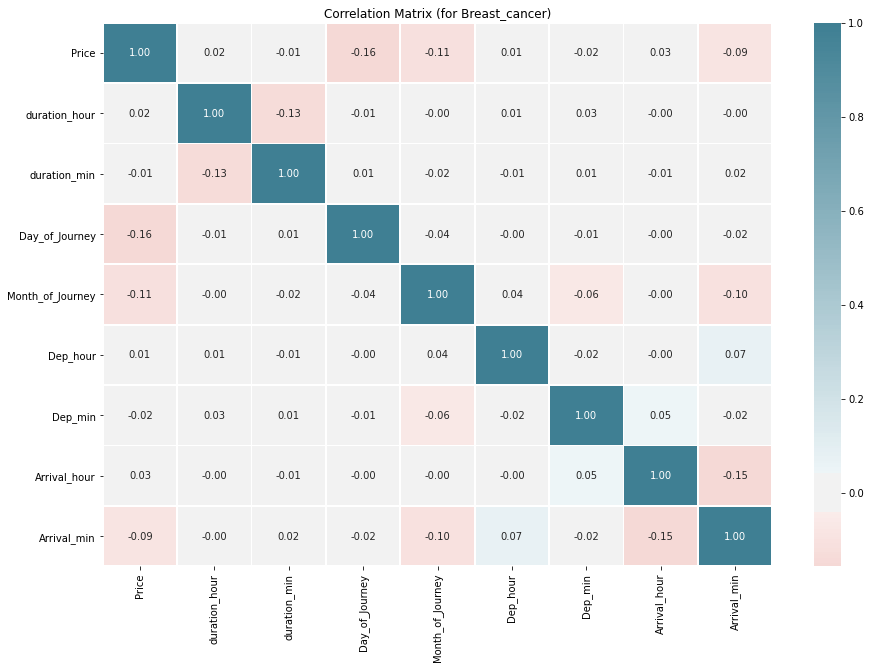

In [32]:
# Correlation Matrix
fig_df=(15,10)
fig,ax=plt.subplots(figsize=fig_df)
cmap=sns.diverging_palette(h_neg=15,h_pos=220,as_cmap=True)

sns.heatmap(df.corr(),center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f',ax=ax);
plt.title('Correlation Matrix (for Breast_cancer)')

In [33]:
# statistical describe data set
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,10379.0,9042.445708,4625.583583,1759.0,5228.0,8285.0,12373.0,79512.0
duration_hour,10379.0,10.094518,8.409152,0.0,2.0,8.0,15.0,47.0
duration_min,10379.0,28.235861,16.894976,0.0,15.0,30.0,45.0,55.0
Day_of_Journey,10379.0,13.482705,8.475906,1.0,6.0,12.0,21.0,27.0
Month_of_Journey,10379.0,4.703729,1.165276,3.0,3.0,5.0,6.0,6.0
Dep_hour,10379.0,12.464207,5.725926,0.0,8.0,11.0,17.5,23.0
Dep_min,10379.0,24.451296,18.798206,0.0,5.0,25.0,40.0,55.0
Arrival_hour,10379.0,13.362270,6.861344,0.0,8.0,14.0,19.0,23.0
Arrival_min,10379.0,24.730706,16.549162,0.0,10.0,25.0,35.0,55.0


In [34]:
from tabulate import tabulate

stats_ = df.describe().T.drop(["count", "25%", "75%"], axis=1)
stats_ = pd.concat([stats_, df.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "median", "max", "skew" ]
cols = ["mean", "median", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".1f"))

                    mean    median     std    skew     min      max
----------------  ------  --------  ------  ------  ------  -------
Price             9042.4    8285.0  4625.6     1.9  1759.0  79512.0
duration_hour       10.1       8.0     8.4     0.9     0.0     47.0
duration_min        28.2      30.0    16.9    -0.1     0.0     55.0
Day_of_Journey      13.5      12.0     8.5     0.1     1.0     27.0
Month_of_Journey     4.7       5.0     1.2    -0.4     3.0      6.0
Dep_hour            12.5      11.0     5.7     0.1     0.0     23.0
Dep_min             24.5      25.0    18.8     0.2     0.0     55.0
Arrival_hour        13.4      14.0     6.9    -0.4     0.0     23.0
Arrival_min         24.7      25.0    16.5     0.1     0.0     55.0


# Exploratory data analysis

Exploratory Data Analysis – Exploratory analysis is the first step of data analysis. Here we get familiar with data, ask questions, visualize the data in a number of forms, look for the relationships between the variables, look for the outliers, patterns and trends in data set.

# Data Exploration

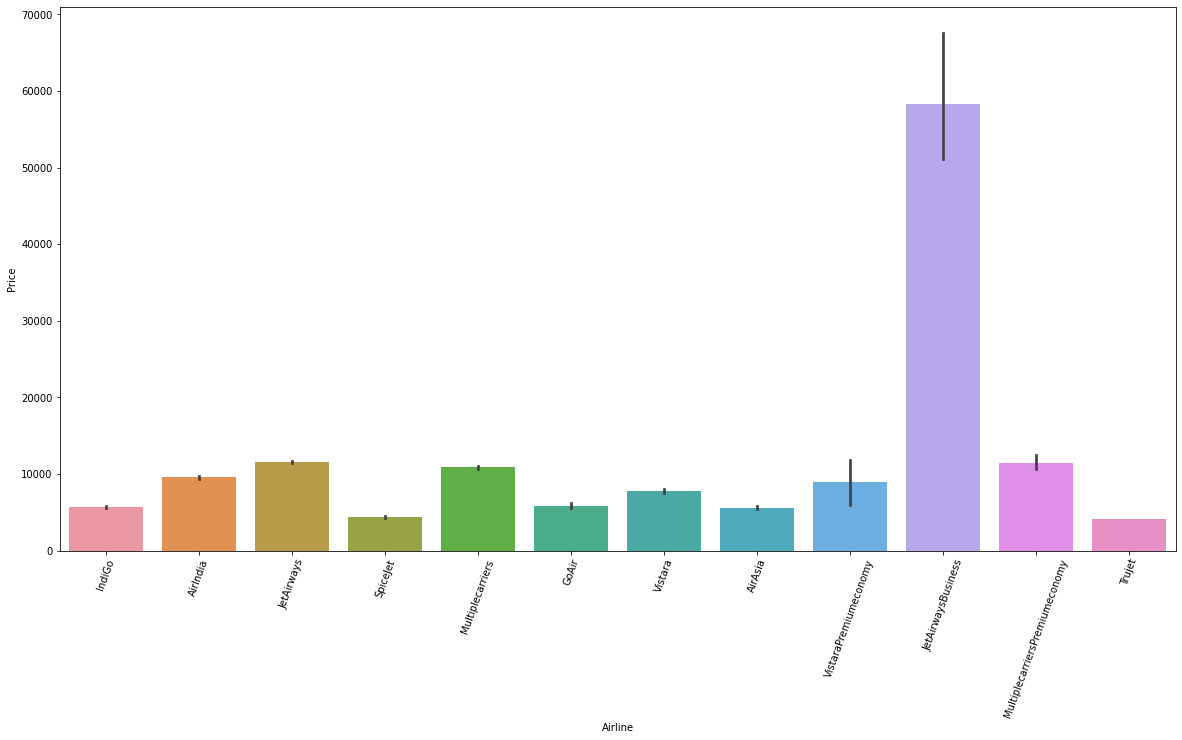

In [36]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Airline',y='Price', data = df)
plt.xticks(rotation=70)
plt.show()

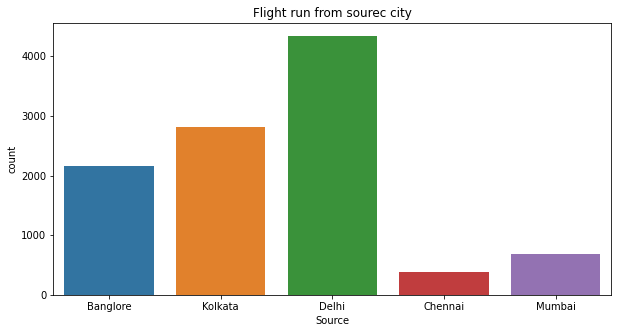

In [37]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Source',data=df)
plt.title('Flight run from sourec city')
plt.show()

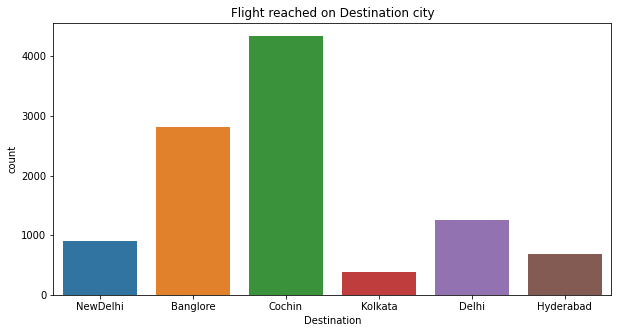

In [38]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Destination',data=df)
plt.title('Flight reached on Destination city')
plt.show()

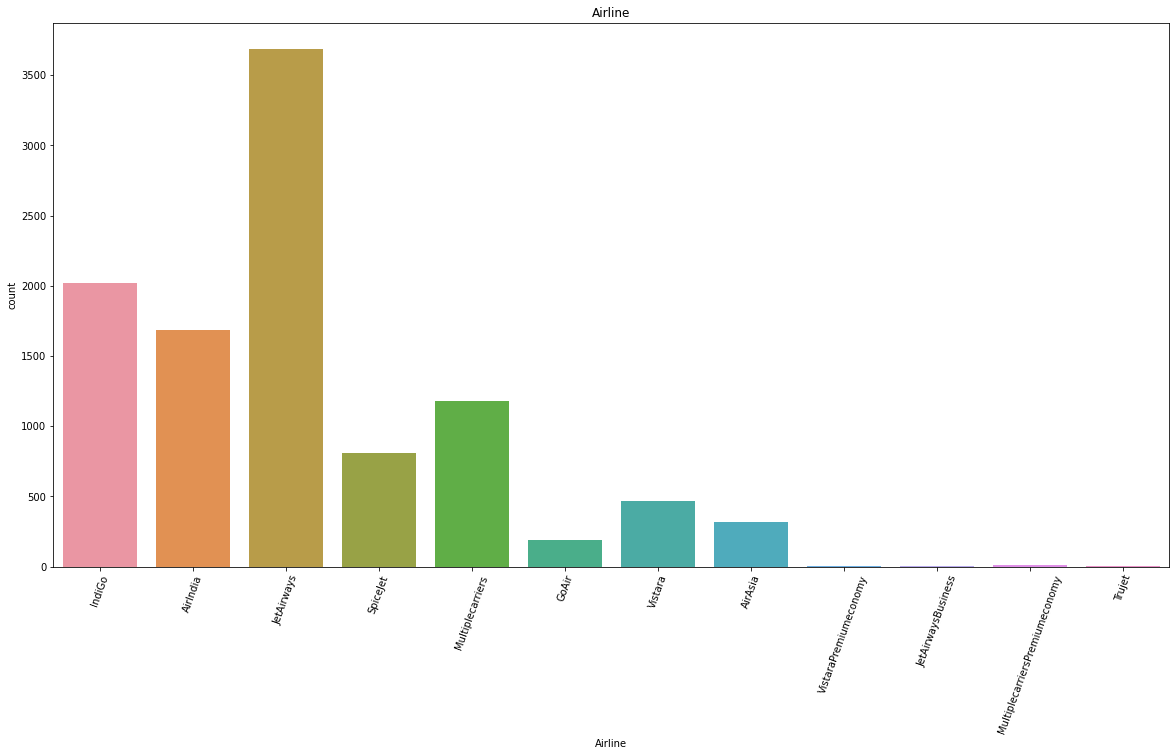

In [39]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Airline',data=df)
plt.title('Airline')
plt.xticks(rotation=70)
plt.show()

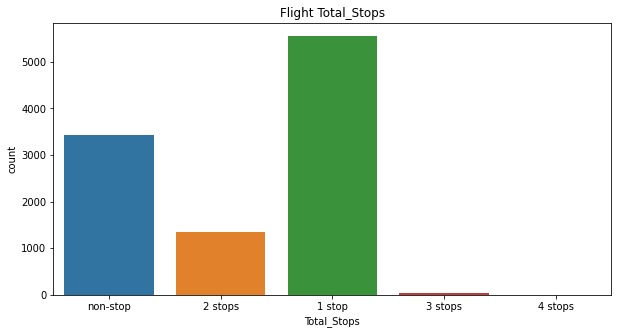

In [40]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Total_Stops',data=df)
plt.title('Flight Total_Stops')
plt.show()

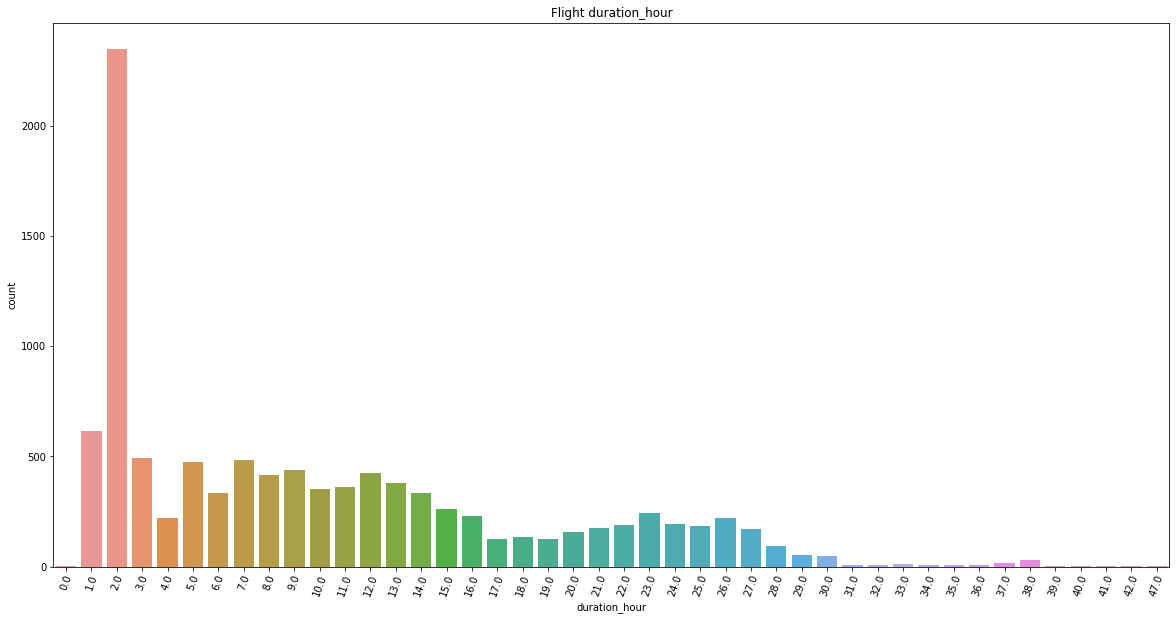

In [41]:
plt.subplots(figsize=(20,10))
sns.countplot(x='duration_hour',data=df)
plt.title('Flight duration_hour')
plt.xticks(rotation=70)
plt.show()



<function matplotlib.pyplot.show>

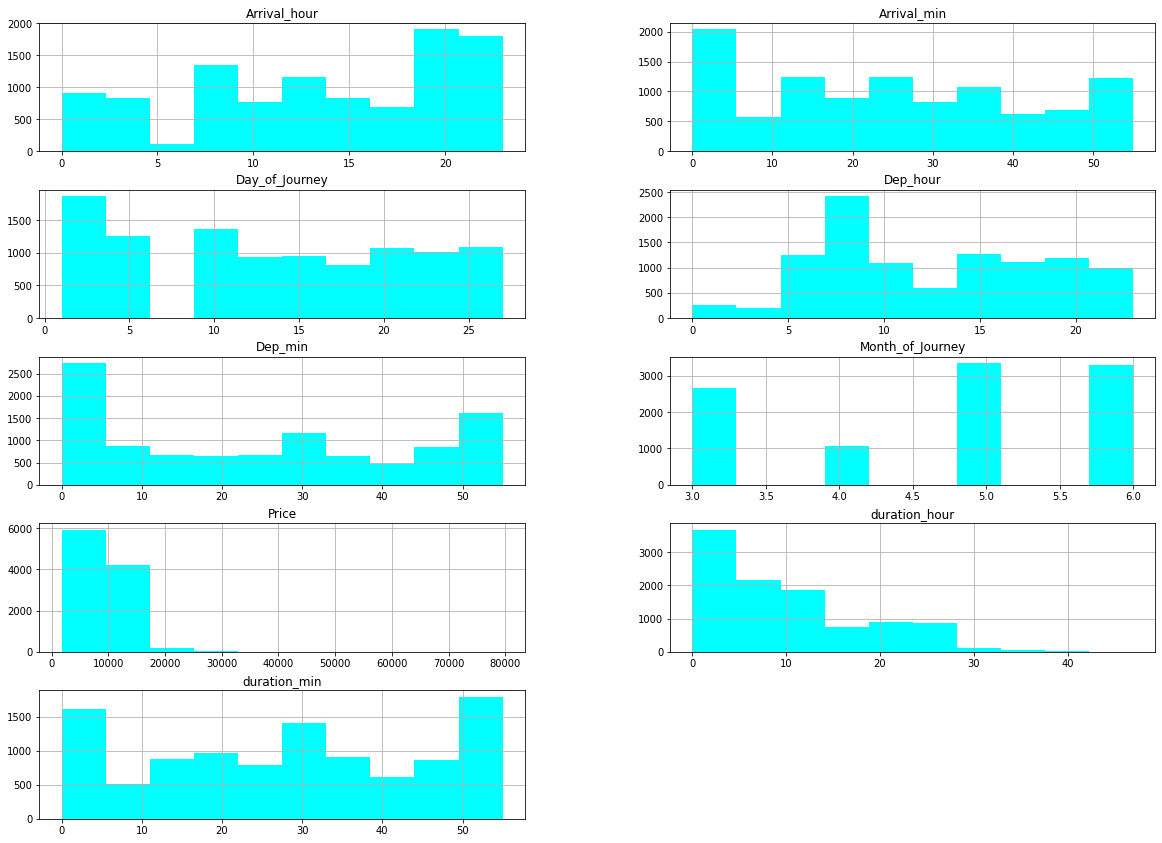

In [42]:
df.hist(figsize=(20,30),layout=(10,2),color='cyan')
plt.show

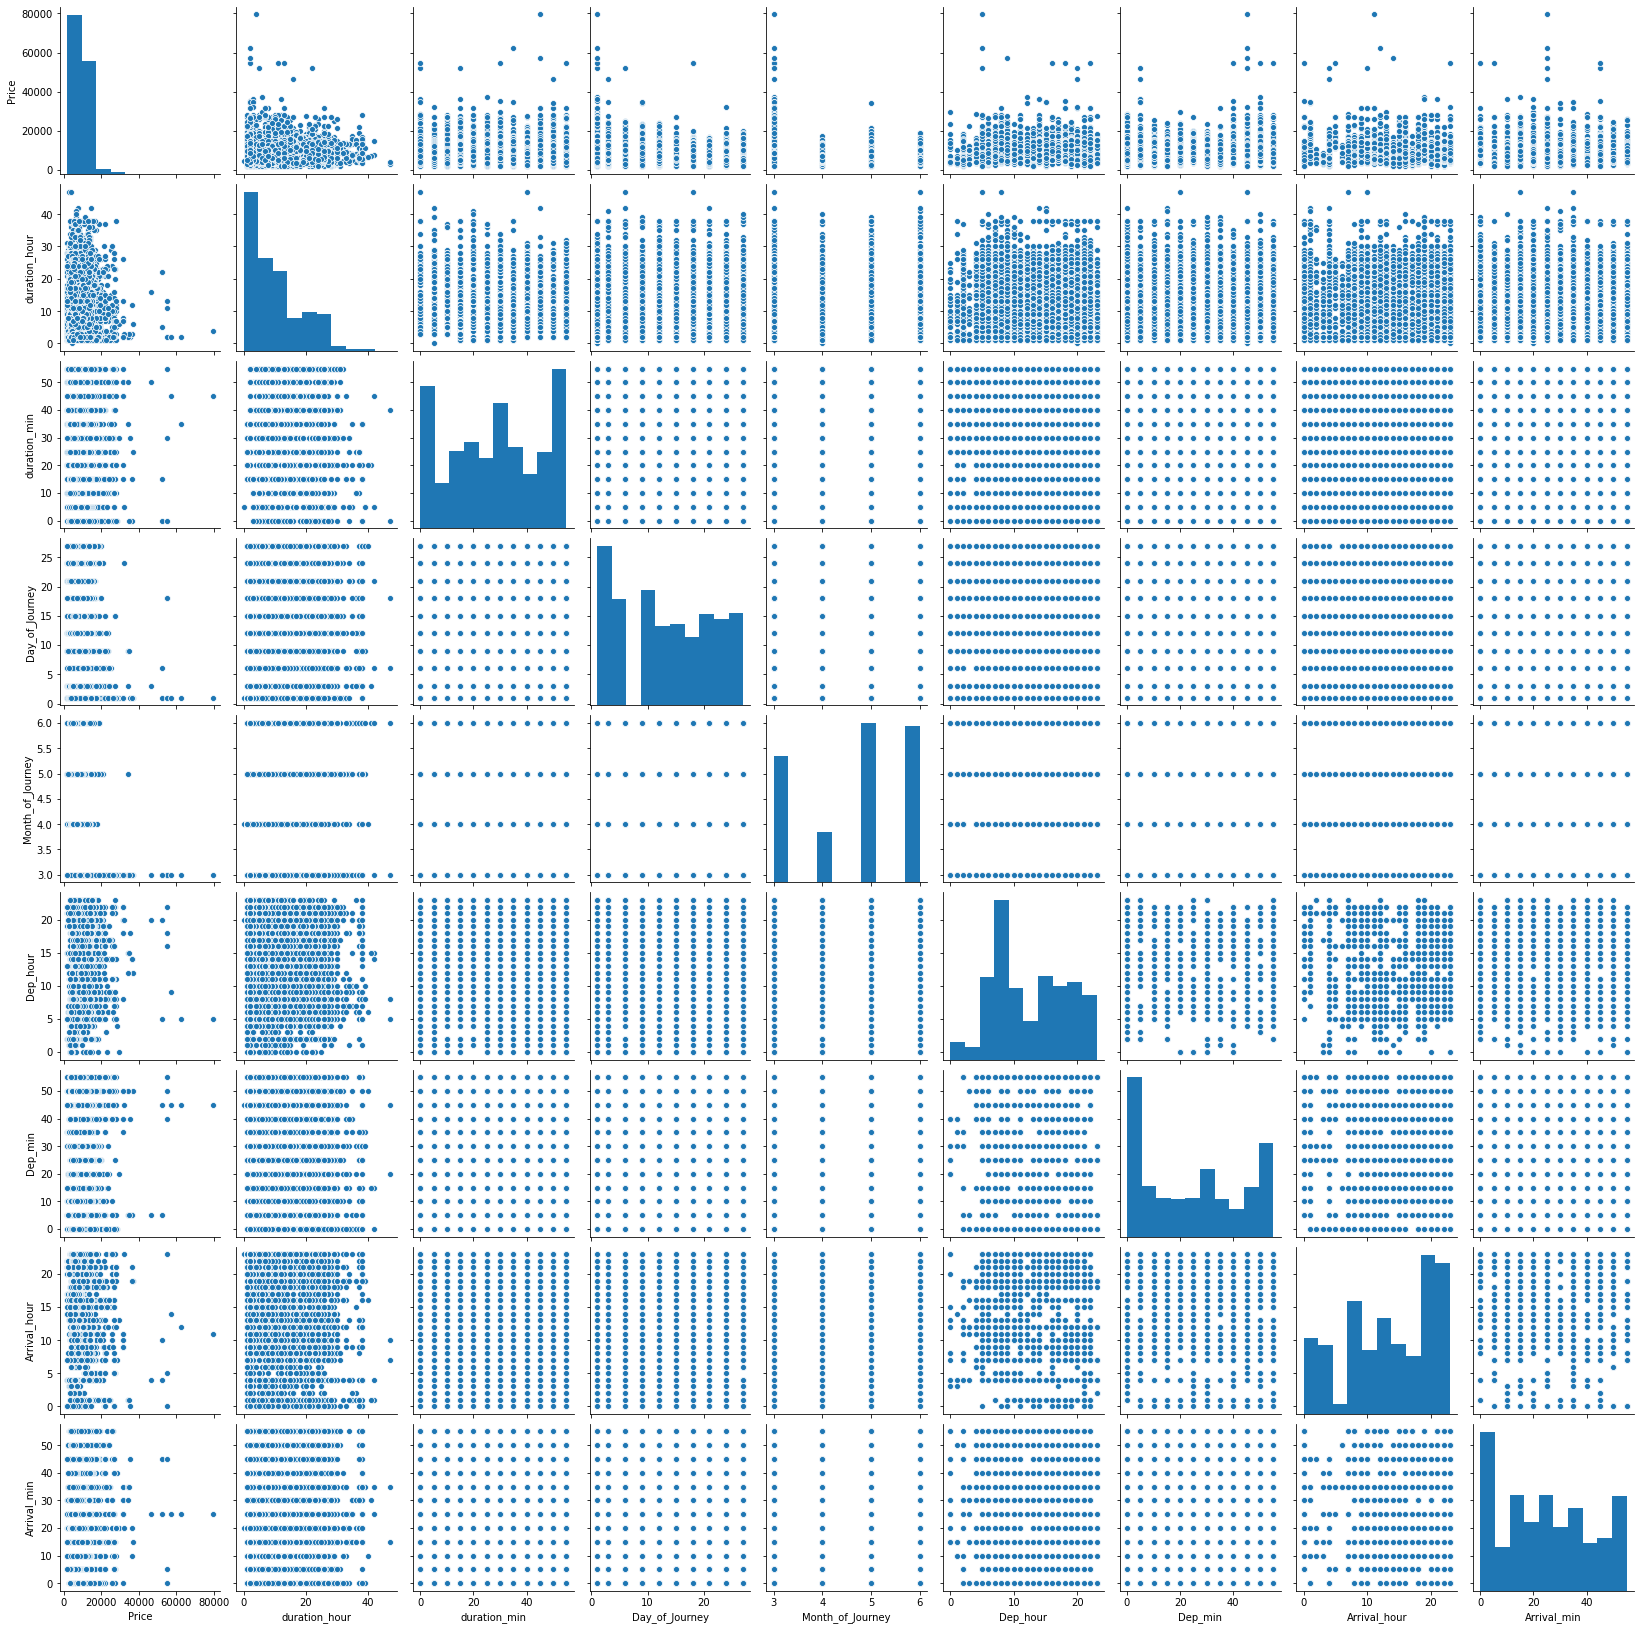

In [43]:
sns.pairplot(df)

# Building Machine Learning Models
Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions.

In [44]:
# import liabraries:

# model test & train split
from sklearn.model_selection import train_test_split

# standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

# encoding categorical values 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# k-Fold Cross-Validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

# stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
# Model Liabraries

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [45]:
# features
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,duration_hour,duration_min,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,NewDelhi,BLR→DEL,non-stop,Noinfo,3897,2.0,50.0,24,3,22,20,1,10
1,AirIndia,Kolkata,Banglore,CCU→IXR→BBI→BLR,2 stops,Noinfo,7662,7.0,25.0,1,5,5,50,13,15
2,JetAirways,Delhi,Cochin,DEL→LKO→BOM→COK,2 stops,Noinfo,13882,19.0,0.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU→NAG→BLR,1 stop,Noinfo,6218,5.0,25.0,12,5,18,5,23,30
4,IndiGo,Banglore,NewDelhi,BLR→NAG→DEL,1 stop,Noinfo,13302,4.0,45.0,1,3,16,50,21,35


In [46]:
data = df.drop(["Price"], axis=1)

In [47]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])


In [48]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,NewDelhi,BLR→DEL,non-stop,Noinfo
1,AirIndia,Kolkata,Banglore,CCU→IXR→BBI→BLR,2 stops,Noinfo
2,JetAirways,Delhi,Cochin,DEL→LKO→BOM→COK,2 stops,Noinfo
3,IndiGo,Kolkata,Banglore,CCU→NAG→BLR,1 stop,Noinfo
4,IndiGo,Banglore,NewDelhi,BLR→NAG→DEL,1 stop,Noinfo


In [49]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)

In [50]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,41,4,8
1,1,3,0,136,1,8
2,4,2,1,197,1,8
3,3,3,0,143,0,8
4,3,0,5,52,0,8


In [55]:
# Concatenate both catagorical and numerical data

x = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=df['Price']

In [57]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,duration_hour,duration_min,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,41,4,8,2.0,50.0,24,3,22,20,1,10
1,1,3,0,136,1,8,7.0,25.0,1,5,5,50,13,15
2,4,2,1,197,1,8,19.0,0.0,9,6,9,25,4,25
3,3,3,0,143,0,8,5.0,25.0,12,5,18,5,23,30
4,3,0,5,52,0,8,4.0,45.0,1,3,16,50,21,35


In [58]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [59]:
# dataset is ready now
# split data into train and test data size
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print('-'*50)
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7784, 14)
The size of training output is (7784,)
--------------------------------------------------
The size of testing input is (2595, 14)
The size of testing output is (2595,)


# Ridge Regressor

is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.

In [60]:
print('-'*100)
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
print(ridge_regressor.fit(x_train ,y_train))
print('-'*100)


y_train_pred_rr =ridge_regressor.predict(x_train) ##Predict train result
y_test_pred_rr =ridge_regressor.predict(x_test) ##Predict test result


print("Train Results for Ridge Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_rr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_rr))

print('-'*50)
print("Test Results for Ridge Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_rr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_rr)))
print("R-squared: ", r2_score(y_test, y_test_pred_rr))
print('-'*100)

----------------------------------------------------------------------------------------------------
GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)
----------------------------------------------------------------------------------------------------
Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3727.3078940029363
Mean absolute % error:  34.0
R-squared:  0.3752262580058142
------------------------------------------------

# Lasso Regressor

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [61]:
print('-'*100)
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
print(lasso_regressor.fit(x_train ,y_train))
print('-'*100)

y_train_pred_lr=lasso_regressor.predict(x_train) ##Predict train result
y_test_pred_lr=lasso_regressor.predict(x_test) ##Predict test result

print("Train Results for Lasso Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_lr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_lr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_lr))

print('-'*50)
print("Test Results for Lasso Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_lr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_lr)))
print("R-squared: ", r2_score(y_test, y_test_pred_lr))
print('-'*100)

----------------------------------------------------------------------------------------------------
GridSearchCV(cv=15, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)
----------------------------------------------------------------------------------------------------
Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3727.34868677799
Mean absolute % error:

# KNN (K-Nearest Neighbors)

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [62]:
print('-'*100)
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
print(knn_regressor.fit(x_train, y_train))
print('-'*100)

y_train_pred_knn =knn_regressor.predict(x_train) ##Predict train result
y_test_pred_knn =knn_regressor.predict(x_test) ##Predict test result


print("Train Results for KNN Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_knn)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_knn)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_knn))

print('-'*50)
print("Test Results for KNN Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_knn)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred_knn)))
print("R-squared: ", r2_score(y_test, y_test_pred_knn))
print('-'*100)

----------------------------------------------------------------------------------------------------
GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)
----------------------------------------------------------------------------------------------------
Train Resul

# DecisionTreeRegressor
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

In [63]:
print('-'*100)
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
print(tree.fit(x_train,y_train))
print('-'*100)

y_train_pred_dt =tree.predict(x_train) ##Predict train result
y_test_pred_dt =tree.predict(x_test) ##Predict test result

print("Train Results for Decision Tree Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_dt)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_dt)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_dt))

print('-'*50)
print("Test Results for Decision Tree Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_dt)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_dt)))
print("R-squared: ", r2_score(y_test, y_test_pred_dt))
print('-'*100)

----------------------------------------------------------------------------------------------------
GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7,

# Random Forest Regressor

A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [64]:
print('-'*100)
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
print(random_regressor.fit(x_train, y_train))
print('-'*100)

y_train_pred_rfr = random_regressor.predict(x_train)
y_test_pred_rfr = random_regressor.predict(x_test)


print("Train Results for Random Forest Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_rfr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rfr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_rfr))

print('-'*50)
print("Test Results for Random Forest Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_rfr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_rfr)))
print("R-squared: ", r2_score(y_test, y_test_pred_rfr))
print('-'*100)

----------------------------------------------------------------------------------------------------
RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0

# XGBRegressor

Data Matrix used in XGBoost.

DMatrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed. You can construct DMatrix from multiple different sources of data.

In [65]:
print('-'*100)
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
print(model.fit(x_train, y_train))
print('-'*100)

y_train_pred_xgbr = model.predict(x_train)
y_test_pred_xgbr = model.predict(x_test)

print("Train Results for XGBoost Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_xgbr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_xgbr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_xgbr))

print('-'*50)
print("Test Results for XGBoost Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_xgbr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_xgbr)))
print("R-squared: ", r2_score(y_test, y_test_pred_xgbr))
print('-'*100)

----------------------------------------------------------------------------------------------------
[19:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                

# Final Score

In [66]:
# DecisionTreeRegressor, Random Forest Regressor and XGBRegressor are peforming almost equally good
print('Final Score')
print('-'*100)
print("Train Results for Ridge Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_rr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_rr))
print('-'*100)

print("Train Results for Lasso Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_lr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_lr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_lr))
print('-'*100)


print("Train Results for KNN Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_knn)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_knn)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_knn))
print('-'*100)

print("Train Results for Decision Tree Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_dt)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_dt)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_dt))
print('-'*100)

print("Train Results for Random Forest Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_rfr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_rfr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_rfr))
print('-'*100)

print("Train Results for XGBoost Regressor Model:")
print('-'*50)
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred_xgbr)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred_xgbr)))
print("R-squared: ", r2_score(y_train.values, y_train_pred_xgbr))
print('-'*100)


Final Score
----------------------------------------------------------------------------------------------------
Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3727.3078940029363
Mean absolute % error:  34.0
R-squared:  0.3752262580058142
----------------------------------------------------------------------------------------------------
Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3727.34868677799
Mean absolute % error:  34.0
R-squared:  0.37521258250869605
----------------------------------------------------------------------------------------------------
Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2969.357524336798
Mean absolute % error:  25.0
R-squared:  0.6034871976341492
--------------------------------------------------------------------------------------------------

# Conclusion 

DecisionTreeRegressor, Random Forest Regressor and XGBRegressor are giving Maximum Accuracy as compare to other Regressor algorithm